# Open Science Prize: Supplementary Material

This notebook is meant to provide a little more information about the Open Science Prize, but mostly, this notebook is a launching point from which the motivated learner can find open access sources with even more detailed information.

## 1 The Heisenberg Spin Model
In the open prize notebook, the Hamiltonian you are simulating is defined as the [Heisenberg XXX model](https://en.wikipedia.org/wiki/Quantum_Heisenberg_model#XXX_model) for 3 spins in a line:
$$
H_{\text{Heis3}} = \sigma_x^{(0)}\sigma_x^{(1)} + \sigma_x^{(1)}\sigma_x^{(2)} + \sigma_y^{(0)}\sigma_y^{(1)} + \sigma_y^{(1)}\sigma_y^{(2)} + \sigma_z^{(0)}\sigma_z^{(1)} + \sigma_z^{(1)}\sigma_z^{(2)}.
$$

### 1-1 Why call it XXX?
The XXX model is one of a family of spin models known as [Heisenberg spin models](https://en.wikipedia.org/wiki/Quantum_Heisenberg_model). In some sense, the most general form of Heisenberg model is often refered to as the XYZ model. The name 'XYZ' is used because the three pair-wise operators $\sigma_x\sigma_x$, $\sigma_y\sigma_y$, and $\sigma_z \sigma_z$ in the Hamitlonian have different coefficients $J_x$, $J_y$, and $J_z$ respectively. In the case where $J_x = J_y = J_z$, the model is labeled the 'XXX' model.

### 1-2 Numerically computing the matrix representation
To compute the matrix representation of $H_{\text{Heis3}}$, we are actually missing some pieces namely the identity operator $I$ and the [tensor product](https://en.wikipedia.org/wiki/Tensor_product#Tensor_product_of_linear_maps) $\otimes$ symbol. They are both often left out in when writing a Hamiltonian, but they are implied to be there. Writing out the full $H_{\text{Heis3}}$ including the identity operators and tensor product symbols
$$
H_{\text{Heis3}} = \sigma_x^{(0)}\otimes\sigma_x^{(1)}\otimes I^{(2)} + I^{(0)} \otimes\sigma_x^{(1)}\otimes\sigma_x^{(2)} + \sigma_y^{(0)}\otimes\sigma_y^{(1)}\otimes I^{(2)} + I^{(0)} \otimes \sigma_y^{(1)}\otimes\sigma_y^{(2)} + I^{(0)} \otimes\sigma_z^{(0)}\otimes\sigma_z^{(1)} + I^{(0)}\otimes\sigma_z^{(1)}\otimes\sigma_z^{(2)}.
$$
You can see why physicists don't write that all out all the time.

#### 1-2.1 Tensor product vs Kronecker product

A point of clarity about jargon. To numerically compute the [tensor product](https://en.wikipedia.org/wiki/Tensor_product#Tensor_product_of_linear_maps) of $\sigma_x\otimes\sigma_x$, as an example, we often have already chosen to be working with the matrix representation of the operators at hand ($\sigma_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$ in this example). Because a computer works in the matrix representation, what a computer does is actually called a [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product#Examples). When doing numerically computations, Kronecker product is the name you would look up for the given software package you're using such as [Mathematica](https://reference.wolfram.com/language/ref/KroneckerProduct.html), [numpy](https://numpy.org/doc/stable/reference/generated/numpy.kron.html), or [Qiskit](https://qiskit.org/documentation/tutorials/operators/01_operator_flow.html#Pauli-operators,-sums,-compositions,-and-tensor-products). 

Below is an example in Qiskit and numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts

# Import Qubit states Zero (|0>) and One (|1>), and Pauli operators (X, Y, Z)
from qiskit.opflow import Zero, One, I, X, Y, Z

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Compute a kronecker product in qiskit
# Qiskit already knows what I and X are (the identity and Pauli-X operators), so to compute the kronecker product it's very simple: ^
IX_qiskit = (I^X)
print('Qiskit Kronecker product:\n', IX_qiskit.to_matrix())

print("----------------")

# Compute a kronecker product in numpy
X_numpy = np.array([[0,1],[1,0]], dtype=complex)
I_numpy = np.eye(2, dtype=complex)

IX_numpy = np.kron(I_numpy, X_numpy)
print('Numpy Kronecker product:\n', IX_numpy)

Qiskit Kronecker product:
 [[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
----------------
Numpy Kronecker product:
 [[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


## 2 Using OpFlow
Qiskit offers [functionality for mathematically working with quantum states and operators](https://qiskit.org/documentation/apidoc/opflow.html) called ```opflow``` with tutorials found [here](https://qiskit.org/documentation/tutorials/operators/index.html). Opflow is especially convenient when dealing with large numbers of qubits as tensor products can become unweildy when using numpy both in size and syntax. For example, to define $H_{\text{Heis3}}$, we could use ```numpy```'s ```numpy.kron(...)``` function to compute the tensor product as shown below.

In [3]:
# Returns matrix representation of the XXX Heisenberg model for 3 spin-1/2 particles in a line (uses np.kron())
def H_heis3_np_kron():
    #iden is the identity matrix; sig_x, sig_y, and sig_z are Pauli matrices
    iden = np.eye(2,2)
    sig_x = np.array([[0,1],[1,0]])
    sig_y = np.array([[0,-1j],[1j,0]])
    sig_z = np.array([[0,1],[0,-1]])
    
    # Interactions (np.kron(A,B) is the tensor product of A and B)
    XXs = np.kron(iden, np.kron(sig_x, sig_x)) + np.kron(sig_x, np.kron(sig_x, iden))
    YYs = np.kron(iden, np.kron(sig_y, sig_y)) + np.kron(sig_y, np.kron(sig_y, iden))
    ZZs = np.kron(iden, np.kron(sig_z, sig_z)) + np.kron(sig_z, np.kron(sig_z, iden))
    
    # Sum interactions
    H = XXs + YYs + ZZs
    
    # Return Hamiltonian
    return H

# Returns matrix representation of the XXX Heisenberg model for 3 spin-1/2 particles in a line (uses opflow)
def H_heis3_opflow():
    
    # Interactions (I is the identity matrix; X, Y, and Z are Pauli matricies; ^ is a tensor product)
    XXs = (I^X^X) + (X^X^I)
    YYs = (I^Y^Y) + (Y^Y^I)
    ZZs = (I^Z^Z) + (Z^Z^I)
    
    # Sum interactions
    H = XXs + YYs + ZZs
    
    # Return Hamiltonian
    return H

Using opflow, however, the math is much easier to read and does not require recursive function calls, which can be confusing when generalizing a Hamiltonian to many qubits. Also, the operators do not need to be explicity computed in opflow saving memory. In opflow, the carrot symbol ```^``` denotes a tensor product. Important note, paranetheses are often needed to clarify the order of operations especially if doing other math operations such as ```+```. See below.

In [4]:
# Example of incorrectly adding two PauliOp objects.
op = X^X + Z^Z
print('matrix dimensions of op:', op.to_matrix().shape)

matrix dimensions of op: (8, 8)


The shape of ```op``` should be (4,4) since $X$ and $Z$ are 2x2, but without parentheses, the order of operations is not correct. Shown below is the correct way of adding the two tensored Pauli operators in opflow.

In [5]:
# Example of correctly adding two PauliOp objects.
op = (X^X) + (Z^Z)
print('matrix dimensions of op:', op.to_matrix().shape)

matrix dimensions of op: (4, 4)


## 3 Solution to the Time-Independent Schrödinger Equation

The [Schrödinger equation](https://en.wikipedia.org/wiki/Schrödinger_equation) is a foundational pillar of quantum mechanics. It relates how a quantum state $|\psi(t)\rangle$ changes in time given what the state was initially $|\psi(0)\rangle$. It's solution is relatively simple (more on how it's not simple in the next section) when the Hamiltonian $H$ that governs the state evolvution does not depend on time. Treating Schrödinger equation as the differential equation it is, we can use separation of variables to solve it

$$
\begin{align}
i \hbar \frac{d |\psi(t)\rangle}{dt} &= H|\psi(t)\rangle \\
|\psi(t)\rangle &= e^{-iHt / \hbar} |\psi(0)\rangle.
\end{align}
$$

## 4 Exponential of a Matrix
The solution to the [Schrödinger equation](https://en.wikipedia.org/wiki/Schrödinger_equation) for a Hamiltonian $H$ that does not depend on time (and $\hbar = 1$) is
$$
|\psi(t)\rangle = e^{-iHt}|\psi(0)\rangle.
$$
But, what does it mean to take $e$ to the power of an operator $H$? Let's briefly address this topic and give references where you can learn more.

Working with the the matrix representation of $H$, the time evolution $U_H(t) = e^{-iHt}$ can be numerically and algebraically evaluated using a [taylor series expansion](https://en.wikipedia.org/wiki/Taylor_series#Exponential_function) ($e^x = 1 + x + x^2/2! + x^3/3! + ... $) . This is often where computers step in. Although, single Pauli operators (e.g. $H=\sigma_x$) have a nice algebraic result. On a computer, many different software packages have methods for computing $e^A$ where $A$ is a matrix (see scipy's [expm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or opflow's [.exp_i()](https://qiskit.org/documentation/tutorials/operators/01_operator_flow.html#Evolutions,-exp_i(),-and-the-EvolvedOp)).

We do need to be careful when the matrix that is being exponentiated is a sum of operators that do not commute ($[A,B] = AB - BA \neq 0$). For example, if $H = \sigma_x + \sigma_z$, we need to take care in working with $e^{it(\sigma_x + \sigma_z)}$ since the Pauli operatos $\sigma_x$ and $\sigma_z$ do not commute $[\sigma_x, \sigma_z] = \sigma_x \sigma_z - \sigma_z \sigma_x = -2i\sigma_y \neq0$. If we want to apply $e^{it(\sigma_x + \sigma_z)}$ on a quantum computer, however, we will want to decompose the sum in the exponential into a product of exponentials. Each product can then be implemented on the quantum computer as a single or two-qubit gate. Continuing the example, $\sigma_x$ and $\sigma_z$ do not commute ($[\sigma_x, \sigma_z] \neq 0$), so we cannot simply decompose the exponential into a product of exponentials $e^{-it(\sigma_x + \sigma_z)} \neq e^{-it\sigma_x}e^{-it\sigma_z}$. This is where approximation methods come in such as Trotterization (more on that in the next section).

## 5 Trotterization

The Open Science Prize notebook ends the decomposition of the unitary time evolution $U_{\text{Heis3}}(t)$ calculation with
$$
U_{\text{Heis3}}(t) \approx \left[XX^{(0,1)}(t/n) YY^{(0,1)}(t/n) ZZ^{(0,1)}(t/n) XX^{(1,2)}(t/n) YY^{(1,2)}(t/n) ZZ^{(1,2)}(t/n) \right]^{n}
$$
where $t$ is time and $n$ is the number of Trotter steps. (Remember, this is not the only possible Trotterization.)

The physical implementation of the two-qubit gates $XX(t)$, $YY(t)$, and $ZZ(t)$ are outlined in the Open Science Prize notebook, though without explanation. Here we provide a brief explanation with references where you can learn more.

Qiskit has a library of circuits that include such gates called the [circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html), but not every gate in the library is native to a physical device. Nonnative gates (such as $XX$, $YY$, $ZZ$, or $ZX$) need to be decomposed into gates that are [native to the physical device](https://qiskit.org/documentation/tutorials/circuits_advanced/08_gathering_system_information.html#Configuration). You may even come across three-qubit gates like XXY or XYZ in some models. These interactions can be decomposition into native gates, or you may find it effective go further and [engineer a typically nonnative interaction](https://qiskit.org/textbook/ch-quantum-hardware/hamiltonian-tomography.html) using Pulse.

Assuming you want to only use native gates and not pulses, this review article is a useful starting point: F. Tacchino, et. al., *Quantum Computers as Universal Quantum Simulators: State-of-the-Art and Perspectives*, [Adv. Quantum Technol. *3* 3 (2020)](https://doi.org/10.1002/qute.201900052) \[[free arxiv version](https://arxiv.org/abs/1907.03505)\]


In this notebook, let's start with the [ZZ gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RZZGate.html)
$$
\begin{align}
ZZ(2t) &= e^{-it\sigma_z \otimes \sigma_z} \\
ZZ(2t) &= \begin{bmatrix} e^{-it} & 0 & 0 & 0 \\ 0 & e^{it} & 0 & 0 \\ 0 & 0 & e^{it} & 0 \\ 0 & 0 & 0 & e^{-it} \\ \end{bmatrix}
\end{align}.
$$
This can be implemented in terms of two-qubit [CNOT gates](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html#qiskit.circuit.library.CXGate) sandwiching a single qubit rotation [$R_z(2t)$ rotation](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RZGate.html) as shown below. (Note that $R_z$ is evaluated at the angle $2t$ instead of the typical $t$ to simplify writing the exponential terms.)

In [6]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit, QuantumRegister, execute

t = Parameter('t')

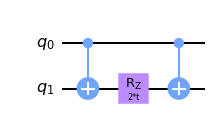

In [7]:
# ZZ in two and single qubit gates
qc = QuantumCircuit(2)
qc.cnot(0,1)
qc.rz(2 * t, 1)
qc.cnot(0,1)

qc.draw(output='mpl')

For fun, let's check this mathematically by evaluating the circuit library ZZ gate and decomposed circuit at various time values.

In [8]:
from qiskit.circuit.library import RXXGate, RYYGate, RZZGate, CXGate
from qiskit.quantum_info.operators import Operator

import qiskit.quantum_info as qi

In [9]:
# time 
time = np.pi/2  # try different time values as a check that the decomposition of ZZ into native gates is accurate

# Qiskit circuit library ZZ gate
qc = QuantumCircuit(2)
qc.append(RZZGate(time), [0,1])
qc_ZZ_matrix = qi.Operator(qc)

# Decomposed ZZ gate
CNOT = Operator(np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]))
Rz = Operator(np.array([[np.exp(-1j*time/2),0], [0,np.exp(1j*time/2)]]))
I_Rz = (Operator(I)^Rz)
np_ZZ_matrix = CNOT@I_Rz@CNOT

# Confirm matrices are the same at time t
np.array_equal(qc_ZZ_matrix, np_ZZ_matrix)

True

The $ZZ(t)$ gate can be rotated to the $XX(t)$ gate by adding single qubit rotations. Single qubit rotations such as $R_y(\pi/2) \sigma_z R_y(-\pi/2) = \sigma_x$ can transform $\sigma_z$ to $\sigma_x$. Consider computing the calculation yourself. Remember that Pauli matrices can be decomposed from an exponential form like so $R_z(2\theta)= \exp\left(-i\theta\sigma_z\right) = \cos(\theta)I - i \sin(\theta)\sigma_z$. Below is an abbreviated calculation to guide your own. Note that most tensor products with the identity have been omitted (e.g. $\sigma_z^{(0)} = \sigma_z^{(0)} \otimes I^{(1)}$), and for extra clarity, each operator has the qubit it acts on indexed in the superscript, so $\sigma_z^{(0)}$ would be the $\sigma_z$ operator acting on qubit $0$.

$$
\begin{align}
\left(R_y^{(0)}(\pi/2) \otimes R_Y^{(1)}(\pi/2)\right) ZZ(t)^{(0,1)}\left( R_y^{(0)}(-\pi/2) \otimes R_Y^{(1)}(-\pi/2)\right) &= \\
\exp\left[\frac{-i\pi}{4}(\sigma_y^{(0)} + \sigma_y^{(1)})\right] \exp\left[\frac{-it}{2} \sigma_z^{(0)} \otimes \sigma_z^{(1)}\right] \exp\left[\frac{i\pi}{4}(\sigma_y^{(0)} + \sigma_y^{(1)})\right] &= \\
\exp\left[\frac{-i\pi}{4}(\sigma_y^{(0)} + \sigma_y^{(1)})\right] \left[\cos(t/2)(I^{(0)} \otimes I^{(1)}) -i\sin(t/2)(\sigma_z^{(0)} \otimes \sigma_z^{(1)}) \right] \exp\left[\frac{i\pi}{4}(\sigma_y^{(0)} + \sigma_y^{(1)})\right] &= \\
\cos(t/2) \exp\left[\frac{-i\pi}{4}(\sigma_y^{(0)} + \sigma_y^{(1)})\right] (I^{(0)} \otimes I^{(1)}) \exp\left[\frac{i\pi}{4}(\sigma_y^{(0)} + \sigma_y^{(1)})\right] - i \exp\left[\frac{-i\pi}{4}(\sigma_y^{(0)} + \sigma_y^{(1)})\right] \sin(t/2)(\sigma_z \otimes \sigma_z) \exp\left[\frac{i\pi}{4}(\sigma_y^{(0)} + \sigma_y^{(1)})\right]  &= \\
\cos(t/2) (I^{(0)} \otimes I^{(1)}) - \frac{i \sin(t/2)}{4} \left[\left(I^{(0)} - i \sigma_y^{(0)}\right) \sigma_z^{(0)} \left(I^{(0)} + i \sigma_y^{(0)}\right)\right] \otimes \left[\left(I^{(1)} - i \sigma_y^{(1)}\right) \sigma_z^{(1)} \left(I^{(1)} + i \sigma_y^{(1)}\right)\right]  &= \\
\cos(t/2) (I^{(0)} \otimes I^{(1)}) - i \sin(t/2) (\sigma_x^{(0)} \otimes \sigma_x^{(1)})  &= \\
\exp\left[\frac{-it}{2} \sigma_x^{(0)} \otimes \sigma_x^{(1)}\right] &=  \\
&= XX(t) \\
\end{align}
$$


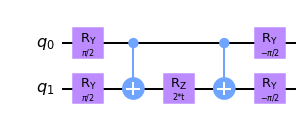

In [10]:
# XX(t)
qc = QuantumCircuit(2)
qc.ry(np.pi/2,[0,1])
qc.cnot(0,1)
qc.rz(2 * t, 1)
qc.cnot(0,1)
qc.ry(-np.pi/2,[0,1])

qc.draw(output='mpl')

Let's check for fun again.

In [11]:
# time 
time = np.pi/6  # try different time values as a check that the decomposition of XX into native gates is accurate

# Qiskit circuit library XX gate
qc = QuantumCircuit(2)
qc.append(RXXGate(time), [0,1])
qc_XX_matrix = qi.Operator(qc).data

# Decomposed XX gate
Rz = Operator(np.array([[np.exp(-1j*time/2),0], [0,np.exp(1j*time/2)]]))
Ry = Operator(np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4), np.cos(np.pi/4)]]))
Ry_minus = Operator(np.array([[np.cos(-np.pi/4), -np.sin(-np.pi/4)],[np.sin(-np.pi/4), np.cos(-np.pi/4)]]))
I_Rz = (Operator(I)^Rz)

np_XX_matrix = (Ry^Ry)@CNOT@I_Rz@CNOT@(Ry_minus^Ry_minus)

# Confirm matrices are the same at time t
np.array_equal(np.round(qc_XX_matrix, 6), np.round(np_XX_matrix, 6))

True

The $ZZ(t)$ gate can be rotated to the $YY(t)$ gate by adding single qubit rotations $R_x(\pi/2) \sigma_z R_x(-\pi/2) = -\sigma_y$ around the $ZZ$ gate just as was done with the $XX$ gate.

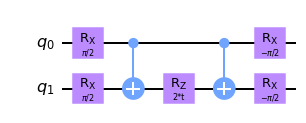

In [12]:
# YY(t)
qc = QuantumCircuit(2)
qc.rx(np.pi/2,[0,1])
qc.cnot(0,1)
qc.rz(2 * t, 1)
qc.cnot(0,1)
qc.rx(-np.pi/2,[0,1])

qc.draw(output='mpl')

In [13]:
# time 
time = np.pi/6  # try different time values as a check that the decomposition of YY into native gates is accurate

# Qiskit circuit library YY gate
qc = QuantumCircuit(2)
qc.append(RYYGate(time), [0,1])
qc_YY_matrix = qi.Operator(qc).data

# Decomposed YY gate
Rz = Operator(np.array([[np.exp(-1j*time/2),0], [0,np.exp(1j*time/2)]]))
Rx = Operator(np.array([[np.cos(np.pi/4), -1j*np.sin(np.pi/4)],[-1j*np.sin(np.pi/4), np.cos(np.pi/4)]]))
Rx_minus = Operator(np.array([[np.cos(-np.pi/4), -1j*np.sin(-np.pi/4)],[-1j*np.sin(-np.pi/4), np.cos(-np.pi/4)]]))
I_Rz = (Operator(I)^Rz)

np_YY_matrix = (Rx^Rx)@CNOT@I_Rz@CNOT@(Rx_minus^Rx_minus)

# Confirm matrices are the same at time t
np.array_equal(np.round(qc_YY_matrix, 6), np.round(np_YY_matrix, 6))

True

## 6 State Tomography
[State tomography](https://qiskit.org/documentation/tutorials/noise/8_tomography.html) is a method for determining the quantum state of a qubit, or qubits, even if the state is in a superposition or entangled. Repeatedly measuring a prepared quantum state may not be enough to determine the full state. For example, what if you want to know if the result of a quantum calculation is the state $|0\rangle -i|1\rangle$?

Repeated measurements in the $Z$-basis would return $|0\rangle$ 50% of the time and $|1\rangle$ 50% of the time. However, there are other states that give the same measurement result, such as $|0\rangle + |1\rangle$, $|0\rangle - |1\rangle$, and $|0\rangle + i|1\rangle$. How could you determine the state you have has the $-i$ phase you're looking for? This requires measurements in [different bases](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#measuring). In state tomography, a quantum circuit is repeated with measurements done in different bases to exhaustively determine the full quantum state (including any phase information). The Open Science Prize this year is using this technique to determine the full quantum state after the quantum simulation. That state is then compared to the exact expected result to compute a fidelity. Although this fidelity only gives information on how well the quantum simulation produces one particular state, it's a more lightweight approach than a full [process tomography](https://qiskit.org/documentation/tutorials/noise/8_tomography.html) caluclation. In short, a high fidelity measured by state tomography doesn't gaurentee a high fidelity quantum simulation, but a low fidelity state tomography does imply a low fidelity quantum simulation.

# 7 Two-Qubit Gate with Pulse
[Qiskit Pulse](https://qiskit.org/documentation/apidoc/pulse.html) offers low-level control of a device's qubits. Pulse allows users to program the physical interactions happening on the superconducting chip. This can be a powerful tool for streamlining circuits \[1-4\], crafting new types of gates \[1-4\], getting [higher fidelity readout](https://www.youtube.com/watch?v=_1XTChcvbOs), and more. Of course, the increased level of control requires more understanding of [the physics of the qubit and how gates are physically generated on chip](https://qiskit.org/textbook/ch-quantum-hardware/transmon-physics.html). For someone new to Pulse, this may seem intimidating. However, there are great tutorials, and the [qiskit textbook](https://qiskit.org/textbook/ch-quantum-hardware/index-pulses.html) can slowly introduce you to these ideas with real and practically useful examples. For those more experienced with Pulse, it may be time to review papers such as this [general overview](https://arxiv.org/pdf/2004.06755.pdf). There will be other papers you find useful for this competition. Below, there is a small--and far from exhaustive--list to get you started \[1-4\].

To aid your efforts, we've provided a simple example of implementing a pulse-efficient [$R_{ZX}$ gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RZXGate.html#qiskit.circuit.library.RZXGate) as outlined in paper [3](https://arxiv.org/pdf/2105.01063.pdf). Note that although the example below is interesting, it is not the only way to make a "pulse-efficient" two-qubit rotation gate.

\[1\] T. Alexander, et al., *Qiskit Pulse: Programming Quantum Computers Through the Cloud with Pulses*, [Quantum Sci. and Technol. **5** 044006 (2020)](https://arxiv.org/pdf/2004.06755.pdf)


\[2\] J. Stenger, et al., *Simulating the dynamics of braiding of Majorana zero modes using an IBM quantum computer*, [Phys. Rev. Research **3**, 033171 (2021)](https://arxiv.org/pdf/2012.11660.pdf)

\[3\] N. Earnest, et al., *Pulse-efficient circuit transpilation for quantum applications on cross-resonance-based hardware*, [arXiv:2105.01063 \[quant-ph\] (2021)](https://arxiv.org/pdf/2105.01063.pdf)

\[4\] S. Oomura, et al., *Design and application of high-speed and high-precision CV gate on IBM Q OpenPulse system*, [arXiv:2102.06117 \[quant-ph\] (2021)](https://arxiv.org/pdf/2102.06117.pdf)

[qiskit experiments repo](https://github.com/Qiskit/qiskit-experiments)

In [14]:
# Import qiskit packages
from qiskit import IBMQ
from qiskit import schedule, transpile
from qiskit.tools.monitor import job_monitor

# load IBMQ Account data
# IBMQ.save_account(TOKEN)
provider = IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
backend = provider.get_backend('ibmq_jakarta')

## 7.1 The [$R_{ZX}$ Gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RZXGate.html#qiskit.circuit.library.RZXGate)
It's now time for an example of implementing a rotational two-qubit gate and how you might go about using Pulse to implement it as efficiently as possible. Remembering the dicussion in sections 4 and 5, we can write out the form of the $R_{ZX}(\theta)$ gate:

$$
R_{ZX}(2\theta) = \exp\left(-i \theta \sigma_z^{(0)} \otimes \sigma_x^{(1)}\right) = \cos(\theta)(I^{(0)}\otimes I^{(1)}) -i \sin(\theta)(\sigma_z^{(0)} \otimes \sigma_x^{(1)})
$$

Let's follow paper [\[3\]](https://arxiv.org/pdf/2105.01063.pdf)'s same line of reasoning. First, implement an $R_{ZX}$ using native circuit gates. Second, compare that circuit's performance to an $R_{ZX}$ gate contrusted from native pulses. Since the competition focuses on Jakarta's qubits 1, 3, and 5, let's just consider an $R_{ZX}$ gate between 1 and 3.

                                                    
q0_0: ──────────────────────────────────────────────
                                                    
q0_1: ──────────────■─────────────────■─────────────
                    │                 │             
q0_2: ──────────────┼─────────────────┼─────────────
      ┌──────────┐┌─┴─┐┌───────────┐┌─┴─┐┌─────────┐
q0_3: ┤ Ry(-π/2) ├┤ X ├┤ Rz(3π/11) ├┤ X ├┤ Ry(π/2) ├
      └──────────┘└───┘└───────────┘└───┘└─────────┘


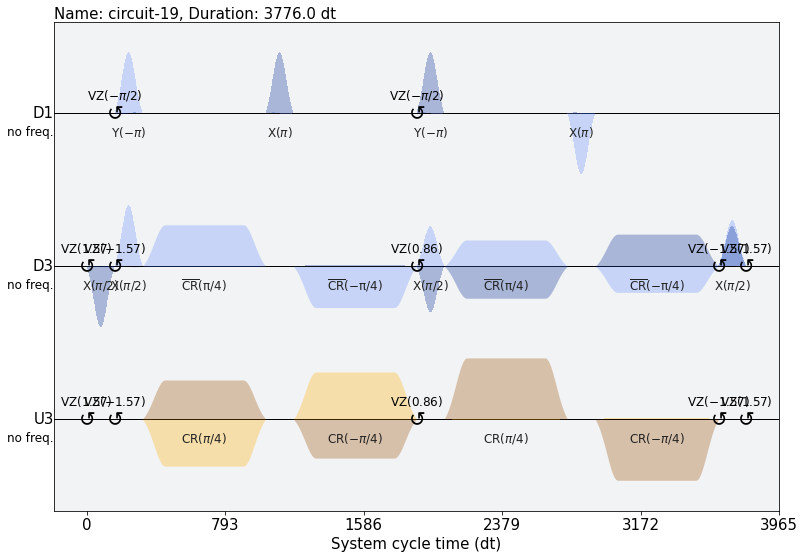

In [15]:
# RZX gate circuit (see section 5 for details on why this is the circuit for RZX)
theta = 3*np.pi/11 # pick arbitrary rotation angle theta

qrs = QuantumRegister(4)
qc = QuantumCircuit(qrs)
qc.ry(-np.pi/2, 3)
qc.cx(1, 3)
qc.rz(theta, 3)
qc.cx(1, 3)
qc.ry(np.pi/2, 3)
print(qc.draw())

qct = transpile(qc, backend)  # display the typical circuit diagram
schedule(qct, backend).draw()  # display what the pulse schedule looks like for the circuit

Now that we have an $R_{ZX}$ circuit implementation (shown above in circuit and pulse schedule forms), let's make the "pulse-efficient" version of $R_{ZX}$. (Spoiler: it's only two pulses!)

In [16]:
# The PassManager helps decide how a circuit should be optimized
# (https://qiskit.org/documentation/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.html)
from qiskit.transpiler import PassManager

# This function will pull pulse-level calibration values to build RZX gates and tell the PassManager to leave RZX gates alone
from qiskit.transpiler.passes import RZXCalibrationBuilderNoEcho

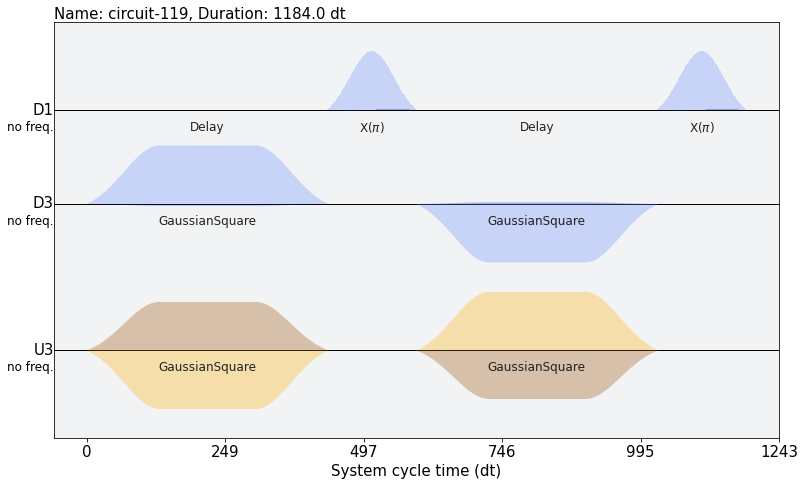

In [17]:
# Equivalent circuit in terms of cross-resonance gates (https://qiskit.org/textbook/ch-quantum-hardware/cQED-JC-SW.html#6.-The-Cross-Resonance-Entangling-Gate)
qrs_pe = QuantumRegister(4)
qc_pe = QuantumCircuit(qrs_pe)
qc_pe.rzx(theta/2, 1, 3)
qc_pe.x(1)
qc_pe.rzx(-theta/2, 1, 3)
qc_pe.x(1)

# Add the pulse-level calibrations
pm = PassManager([RZXCalibrationBuilderNoEcho(backend)])
qc_pulse_efficient = pm.run(qc_pe)

schedule(qc_pulse_efficient, backend).draw()  # show pulse schedule

In [18]:
# Compare the schedule durations
print('Duration of standard CNOT-based circuit:')
print(schedule(qct, backend).duration)
print('Duration of pulse-efficient circuit:')
print(schedule(qc_pulse_efficient, backend).duration)

Duration of standard CNOT-based circuit:
3776
Duration of pulse-efficient circuit:
1184


You've just optimized an $R_{ZX}$ gate using pulse-level control! The shorter circuit time for the pulse-efficient circuit is great news! The shorter the circuit, the less likely the qubit will decohere. This time savings, and fewer pulses to the qubits, will reduce errors. Let's quantify this reduction by measuring the [process fidelity](https://qiskit.org/documentation/tutorials/noise/8_tomography.html) of the two circuits. If we wanted to be thorough, we should do a [randomized benchmarking](https://qiskit.org/textbook/ch-quantum-hardware/randomized-benchmarking.html) as shown in Fig. 1 of paper [\[3\]](https://arxiv.org/pdf/2105.01063.pdf).

In [19]:
# Process tomography functions
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter

# Get exact gate for comparison in process tomography
from qiskit.circuit.library import RZXGate

# Get the ideal unitary operator to compare to circuit output
target_unitary = qi.Operator(RZXGate(theta).to_matrix())

# Generate process tomography circuits and run
qpt_qcs = process_tomography_circuits(qc, [qrs[1], qrs[3]])
job = execute(qpt_qcs, backend, shots=8192)

In [20]:
job_monitor(job)

Job Status: job has successfully run


In [21]:
# Extract tomography data
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_qcs)

# Tomographic reconstruction
choi_fit_lstsq = qpt_tomo.fit(method='lstsq')
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit_lstsq, target=target_unitary)))

Average gate fidelity: F = 0.91322


Now for the pulse-efficient gate

In [22]:
# Generate process tomography circuits and run
qpt_qcs = process_tomography_circuits(qc_pulse_efficient, [qrs_pe[1], qrs_pe[3]])
job = execute(qpt_qcs, backend, shots=8192)

In [23]:
job_monitor(job)

Job Status: job has successfully run


In [24]:
# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_qcs)

# Tomographic reconstruction
choi_fit_lstsq = qpt_tomo.fit(method='lstsq')
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit_lstsq, target=target_unitary)))

Average gate fidelity: F = 0.92471


This is just one example of how Pulse could be used. Read [tutorials](https://qiskit.org/documentation/tutorials/circuits_advanced/05_pulse_gates.html), papers, and the [Qiskit youtube channel](https://www.youtube.com/c/qiskit) for more ideas.

In [27]:
import qiskit.tools.jupyter
%qiskit_version_table